In [2]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(7,5)})
sns.set(style="whitegrid")
import missingno as msno

import warnings

warnings.filterwarnings('ignore')

In [3]:
os.chdir("D:\Rfiles")

In [4]:
df = pd.read_csv("bikedata.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Initial Hypothesis

Here are some of the hypothesis which we can initially make:

Season : We have four seasons here (1:springer, 2:summer, 3:fall, 4:winter) , we cant say how people will behave there ,so lets assume there are similar demands in all seasons.

Year : There must be increase in demand in next year(company must have gotten popular, just initial hypothesis).

Month : There must be more demand in months where condition is favorable.

Holiday :if people are using it for commute, the demand will be less on holiday.

weekday: if people are using it for commute, the demand will less on weekend.

Wheathersit : if the situtaion is favorable, then the demand will be high(if its raining , the demand will be less)

Temperature: If temp in that area is cold ,then as temp increase people will come out and can use bikes as the day would be more favorable.

Humidity , windspeed : Here also the condition is needed as favorbale.

Registered and Casual : The use of bikes by registered users would be more as compared to casual.


These are some hypothesis we can make just by trying to understand the business problem and looking at the factors which are influencing the business.

 

#  Understanding the data 

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df.shape

(731, 16)

In [8]:
#lets rename some columns

df = df.rename(columns = {'dteday':'dateday','mnth': 'month' , 'yr':'year','cnt':'count'})

In [10]:
#checking the data types of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dateday       731 non-null object
season        731 non-null int64
year          731 non-null int64
month         731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
count         731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
#lets chnage the type of the columns
df['dateday'] = pd.to_datetime(df['dateday'],yearfirst=True)
df['season'] = df['season'].astype('category')
df['year'] = df['year'].astype('category')
df['month'] = df ['month'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

df['temp'] = df['temp'].astype('float')
df['atemp'] = df['atemp'].astype('float')
df['hum'] = df['hum'].astype('float')
df['windspeed'] = df['windspeed'].astype('float')
df['casual'] = df['casual'].astype('float')
df['registered'] = df['registered'].astype('float')
df['count'] = df['count'].astype('float')


In [12]:
#checking again type of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dateday       731 non-null datetime64[ns]
season        731 non-null category
year          731 non-null category
month         731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null float64
count         731 non-null float64
dtypes: category(7), datetime64[ns](1), float64(7), int64(1)
memory usage: 57.8 KB


In [13]:
#making the instant as index
df.set_index('instant', inplace=True)

In [14]:
df.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [15]:
df.describe()

,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# UNIVARIATE ANALYSIS

In [16]:
#checking the skewness(symmetry) of the columns
df.skew()

temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
count        -0.047353
dtype: float64

the skew limit is -1 to 1 , so from numercial variables  temp , atemp , hum , windspeed, casual , registered , cnt . 
so these casual (1.2 ) is highy skewed and others are modererly skewed .


so it means that there might be chance of having outliers in casual 

In [17]:
df.kurt()

temp         -1.118864
atemp        -0.985131
hum          -0.064530
windspeed     0.410922
casual        1.322074
registered   -0.713097
count        -0.811922
dtype: float64

the kurtness of the casual is high here , acceptable value of curtness for normal distribution is -3 to 3.

# Plotting all the numerical columns to see the graph

here we will check how  numerical column is distributed

In [18]:
num_colnames = ['temp','atemp','hum','windspeed','casual','registered']


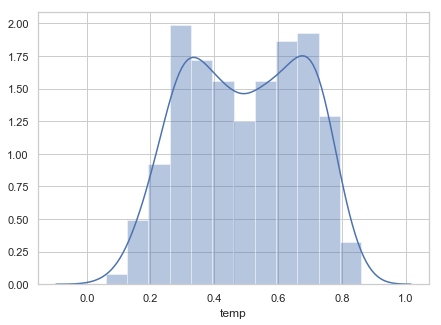

In [19]:
sns.distplot(df['temp'])
# temp is close to normal distribution as it is showing symmetrical curve

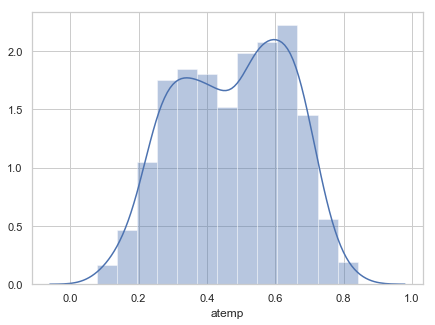

In [20]:
sns.distplot(df['atemp']);
#atemp is close to normal distribution as it is showing symmetrical curve


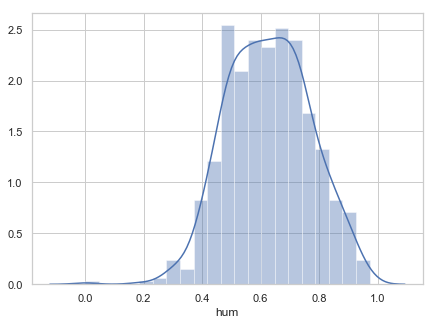

In [21]:
sns.distplot(df['hum']);
# hum is close to normal distribution as it is showing symmetrical curve


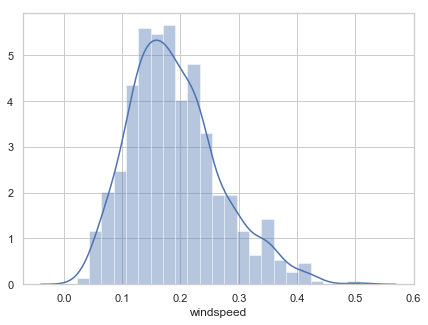

In [22]:
sns.distplot(df['windspeed']);
# windspeed is close to normal distribution but it has some skewness as it somewhat right skewed

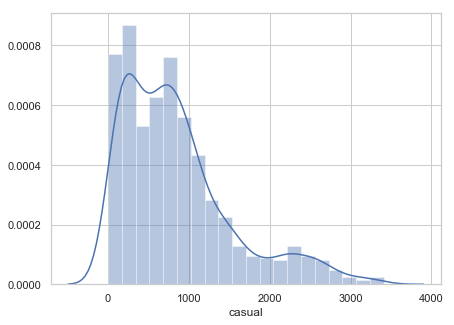

In [23]:
sns.distplot(df['casual']);
# casual is not normally distributed as it not syymnetrical at all

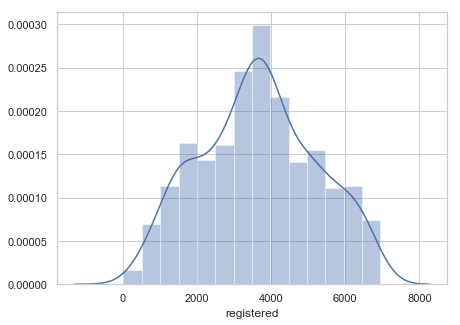

In [24]:
sns.distplot(df['registered']);
# registered is close to normal distribution as it is showing symmetrical curve

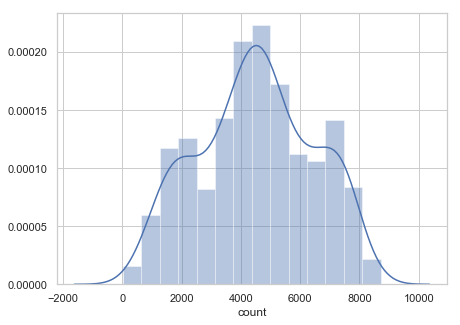

In [25]:
sns.distplot(df['count']);
# count is close to normal distribution as it is showing symmetrical curve

# Bivariate  Relationship

using Scatter plot  and Catplot to see the correlation of numerical and categorical with target(COUNT)

num_colnames = ['temp','atemp','hum','windspeed','casual','registered']


cat_colnames = ['season', 'year','month','holiday', 'weekday','workingday','weathersit']

CATEGORICAL COLUMNS WITH THE TARGET VARIABLE

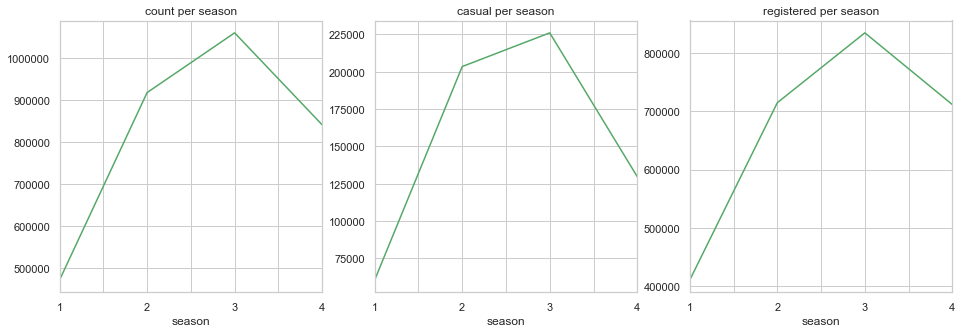

In [26]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(16, 5)


season1=df.groupby('season')['count'].sum()
season1.plot(x='season',y='count',c='g',title='count per season', ax= ax1)

season2=df.groupby('season')['casual'].sum()
season2.plot(x='season',y='casual',c='g',title='casual per season', ax= ax2)

season3=df.groupby('season')['registered'].sum()
season3.plot(x='season',y='registered',c='g',title='registered per season', ax= ax3)

# Here we can see that 
#casual user increases with season 2 and after that in season 3 it goes to top and it is minimum in season 1
#registered user also increases in season  and after that goes to top in season 3
#count is sum of casual and registered, so it also shows same behavior , it also goes on top in season3


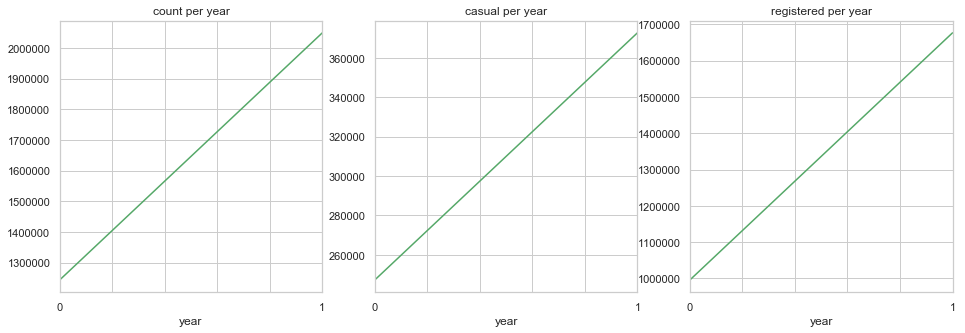

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(16, 5)


year1=df.groupby('year')['count'].sum()
year1.plot(x='year',y='count',c='g',title='count per year', ax= ax1)

year2=df.groupby('year')['casual'].sum()
year2.plot(x='year',y='casual',c='g',title='casual per year', ax= ax2)

year3=df.groupby('year')['registered'].sum()
year3.plot(x='year',y='registered',c='g',title='registered per year', ax= ax3)

# Here we can see that 

#casual user increases in year 1 (that would be year 2012) 
#registered user also increases in year1
#count is sum of casual and registed so it also shows same behaviour , means demand has increases in year 2012 
#as compared to year 0 (2011)

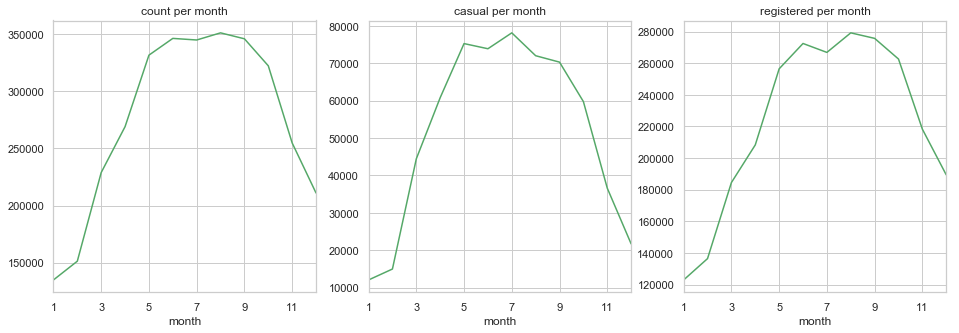

In [28]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(16, 5)


month1=df.groupby('month')['count'].sum()
month1.plot(x='month',y='count',c='g',title='count per month', ax= ax1)

month2=df.groupby('month')['casual'].sum()
month2.plot(x='month',y='casual',c='g',title='casual per month', ax= ax2)

month3=df.groupby('month')['registered'].sum()
month3.plot(x='month',y='registered',c='g',title='registered per month', ax= ax3)


#count increases in month 5  and after that month 10 it decreases (may be because of at that time winter comes)
#casual also increases and then drops after month 10
# registered also increases from month  2 and then decreases after month 

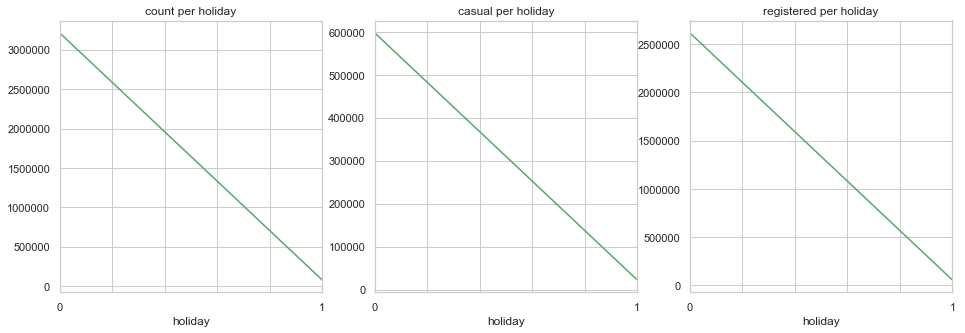

In [29]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(16, 5)


holiday1=df.groupby('holiday')['count'].sum()
holiday1.plot(x='holiday',y='count',c='g',title='count per holiday', ax= ax1)

holiday2=df.groupby('holiday')['casual'].sum()
holiday2.plot(x='holiday',y='casual',c='g',title='casual per holiday', ax= ax2)

holiday3=df.groupby('holiday')['registered'].sum()
holiday3.plot(x='holiday',y='registered',c='g',title='registered per holiday', ax= ax3)

#count decreases on holidays we can say that max bike is rented for commute and on holiday people stay at home 
# casual users also decreases on holiday
#regustered users also decreases on hoiday

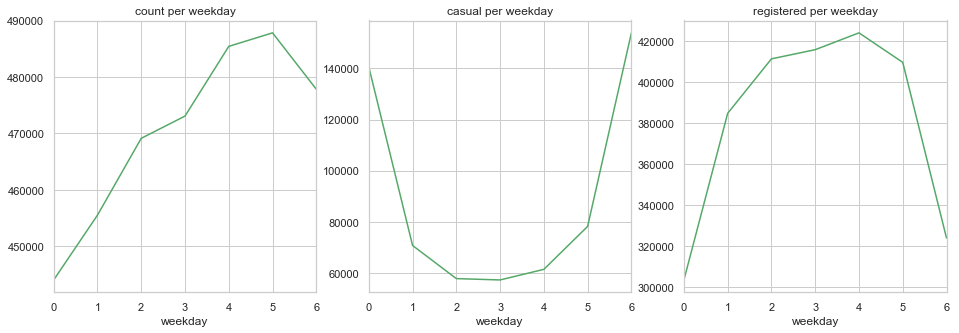

In [30]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(16, 5)


weekday1=df.groupby('weekday')['count'].sum()
weekday1.plot(x='weekday',y='count',c='g',title='count per weekday', ax= ax1)

weekday2=df.groupby('weekday')['casual'].sum()
weekday2.plot(x='weekday',y='casual',c='g',title='casual per weekday', ax= ax2)

weekday3=df.groupby('weekday')['registered'].sum()
weekday3.plot(x='weekday',y='registered',c='g',title='registered per weekday', ax= ax3)

# 0 - sunday(as the number of casual users increases on 0 and there after on 1 (monday ) it decreases)
# 1- monday(as registered users use bikes on monday)
# 2- tuesday
# 3- wednesday
# 4- thrusday
# 5- friay
# 6 - saturday(as the casual starts to rent bikes on saturday)


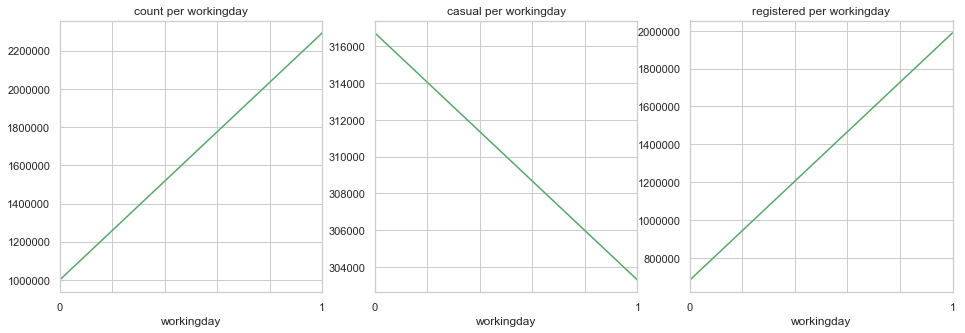

In [31]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(16, 5)


workingday1=df.groupby('workingday')['count'].sum()
workingday1.plot(x='workingday',y='count',c='g',title='count per workingday', ax= ax1)

workingday2=df.groupby('workingday')['casual'].sum()
workingday2.plot(x='workingday',y='casual',c='g',title='casual per workingday', ax= ax2)

workingday3=df.groupby('workingday')['registered'].sum()
workingday3.plot(x='workingday',y='registered',c='g',title='registered per workingday', ax= ax3)

# casual users dont rent bike on working days that means they dont use for commute , they use it ocassionaly 
# registered user use it to go to office and therefore the on working day the number bike rented by registered users increases 
# ovreall count increases on working day as it is sum of registered and casual and we can clearly see that registered users has 
#more impact on total count

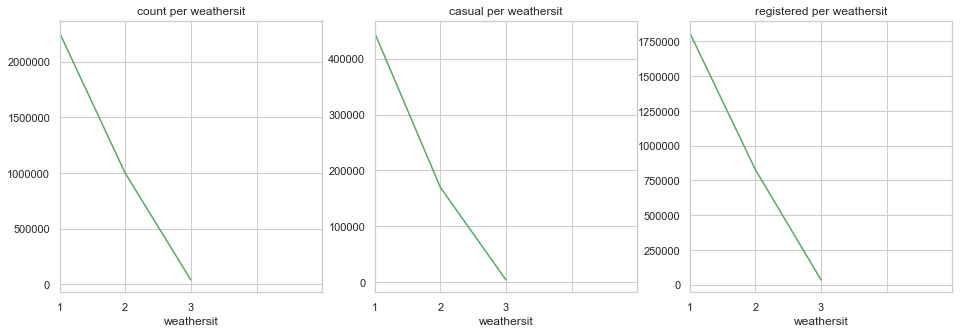

In [32]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(16, 5)


weathersit1=df.groupby('weathersit')['count'].sum()
weathersit1.plot(x='weathersit',y='count',c='g',title='count per weathersit', ax= ax1, xticks=(0,1,2,3,4))

weathersit2=df.groupby('weathersit')['casual'].sum()
weathersit2.plot(x='weathersit',y='casual',c='g',title='casual per weathersit', ax= ax2, xticks=(0,1,2,3,4))

weathersit3=df.groupby('weathersit')['registered'].sum()
weathersit3.plot(x='weathersit',y='registered',c='g',title='registered per weathersit', ax= ax3, xticks=(0,1,2,3,4))

#count including registered and casual decreases in weather 3 and almost drops to zero in weather 4 because 
#weather4 is heavy rain + thunderstorm


NUMERICAL COLUMNS WITH THE TARGET VARIABLE

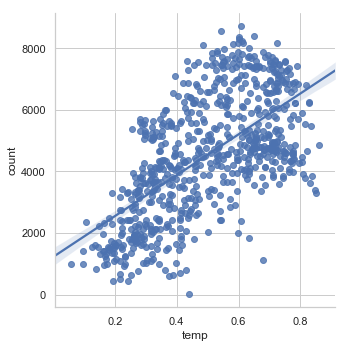

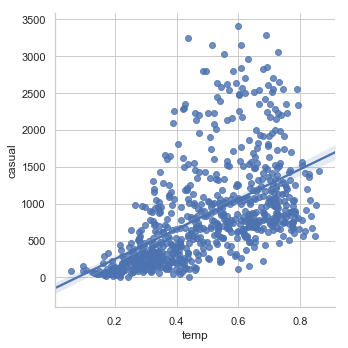

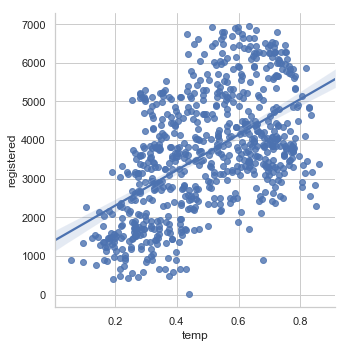

In [33]:
#for numerical columns we are getting the correlation with 


sns.lmplot(x='temp', y='count', data = df ,fit_reg = True)
sns.lmplot(x='temp', y='casual', data = df ,fit_reg = True)
sns.lmplot(x='temp', y='registered', data = df ,fit_reg = True)


# temp has good correlation with casual, registered  and as the count is sum of casual and registered , the corealtion 
#seems good with count also 

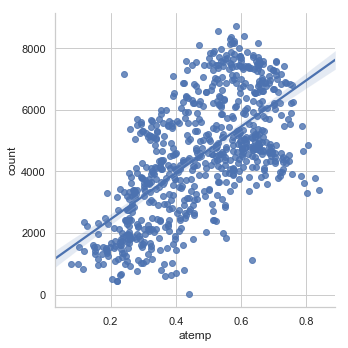

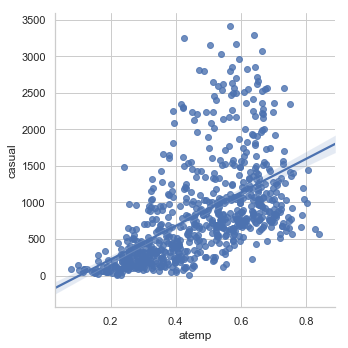

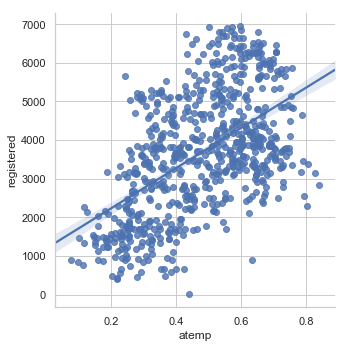

In [34]:
sns.lmplot(x='atemp', y='count', data = df ,fit_reg = True)
sns.lmplot(x='atemp', y='casual', data = df ,fit_reg = True)
sns.lmplot(x='atemp', y='registered', data = df ,fit_reg = True)

#atemp has good correlation with casual, registered  and as the count is sum of casual and registered , the corealtion 
#seems good with count also 

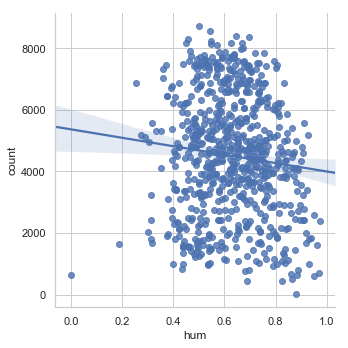

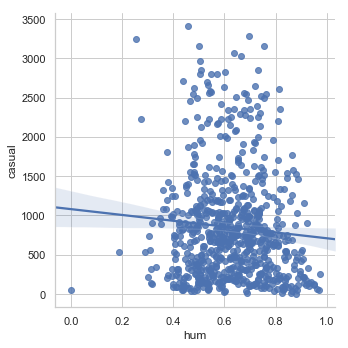

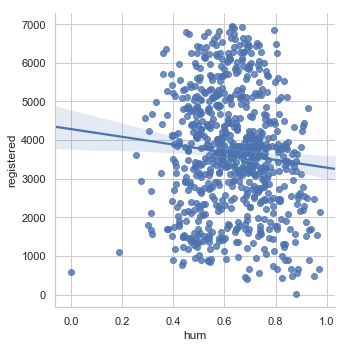

In [35]:
sns.lmplot(x='hum', y='count', data = df ,fit_reg = True)
sns.lmplot(x='hum', y='casual', data = df ,fit_reg = True)
sns.lmplot(x='hum', y='registered', data = df ,fit_reg = True)
# it seems that hum has very less correlation with  count , casual and registered

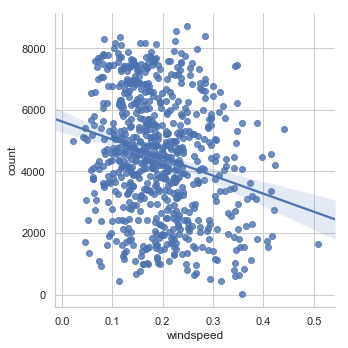

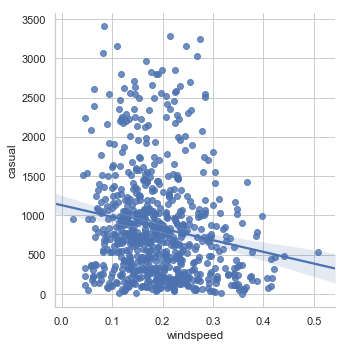

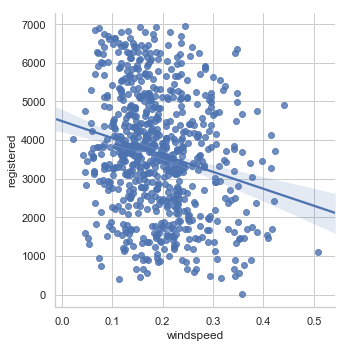

In [36]:
sns.lmplot(x='windspeed', y='count', data = df ,fit_reg = True)
sns.lmplot(x='windspeed', y='casual', data = df ,fit_reg = True)
sns.lmplot(x='windspeed', y='registered', data = df ,fit_reg = True)
#windspeed  also has very less correaltion with count , casual , registered 

we can check the histograms also for these countinous variables

factor plot for categorical with target (cnt). so all categories on x axis and cnt will be on y axis 

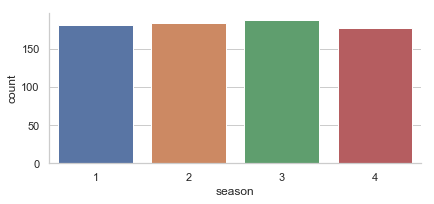

In [37]:
#season
# count of all seasons
df.season.value_counts()
sns.factorplot(x='season',data=df,kind='count',size=3,aspect=2)
#no major conclusion can be drawn from this plot

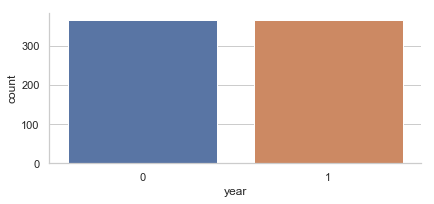

In [38]:
#year
df.year.value_counts()
sns.factorplot(x='year',data=df,kind='count',size=3,aspect=2)
#no major conclusion can be drawn from this plot

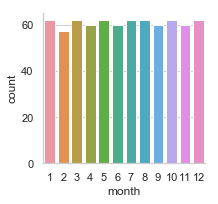

In [39]:
#month
df.month.value_counts()
sns.factorplot(x='month',data=df,kind='count',size=3,aspect=1)
#no major conclusion can be drawn from this plot

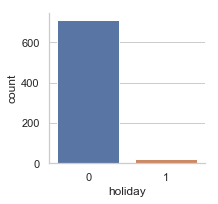

In [40]:
#holiday
df.holiday.value_counts()
sns.factorplot(x='holiday',data=df,kind='count',size=3,aspect=1)

# majority of data is for non holiday days.
#the count of bikes for holiday is very less, means on working day more bikes are rented

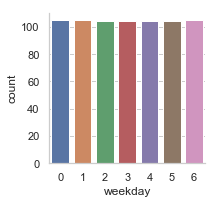

In [41]:
#weekday
df.weekday.value_counts()
sns.factorplot(x='weekday',data=df,kind='count',size=3,aspect=1) 
#no major conclusion

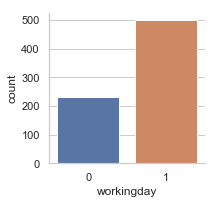

In [42]:
#workingday
df.workingday.value_counts()
sns.factorplot(x='workingday',data=df,kind='count',size=3,aspect=1) 
# majority of time the bike is rented on working days.

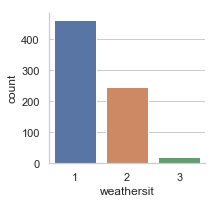

In [43]:
#weathersit
df.weathersit.value_counts()
sns.factorplot(x='weathersit',data=df,kind='count',size=3,aspect=1) 
# people use more bike in weather sit 1
# after that count decreaes and in weather sit 4, count drops to zero.

# Checking if there are any missing values

In [44]:
df.isnull().sum()

dateday       0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

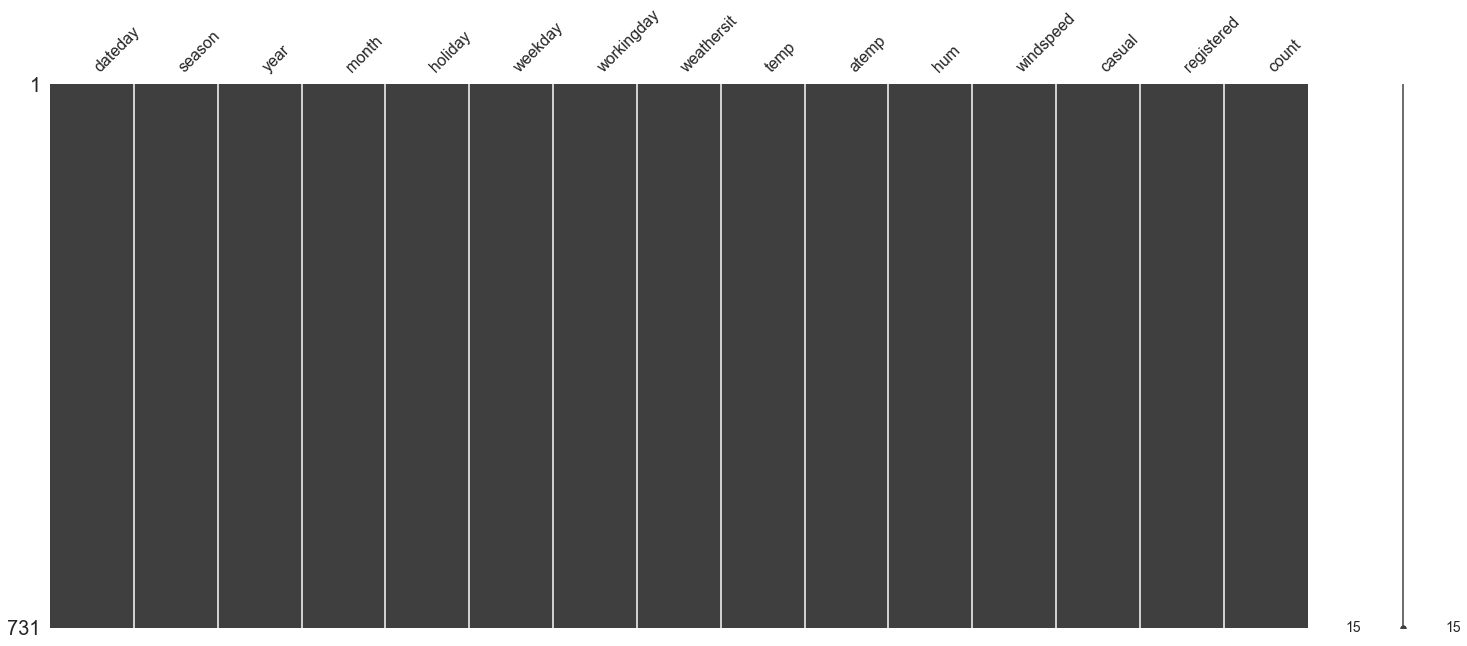

In [45]:
msno.matrix(df)
# no missing value 

# outliers

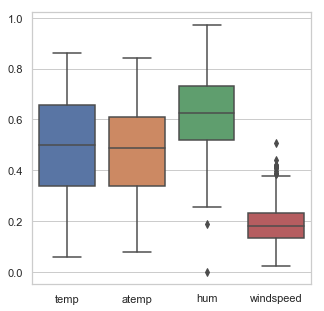

In [46]:
sns.boxplot(data=df[['temp','atemp', 'hum', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(5,5)

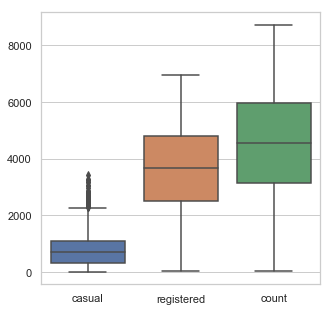

In [47]:
sns.boxplot(data=df[[ 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(5,5)

TREATMENT OF OUTLIER

we are doing outlier analysis on numerical columns  (which we are calling num_colnames)

In [48]:
num_colnames = ['temp','atemp','hum','windspeed','casual','registered']


In [49]:

for i in num_colnames:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print("i",i)
    print("min"  , min)
    print("max", max)
    df.loc[df[i] > max , i ] = np.nan
    df.loc[df[i] < min , i ] = np.nan
  
    


i temp
min -0.14041600000000015
max 1.1329160000000003
i atemp
min -0.06829675000000018
max 1.0147412500000002
i hum
min 0.20468725
max 1.0455212500000002
i windspeed
min -0.012446750000000034
max 0.38061125
i casual
min -855.25
max 2266.75
i registered
min -922.25
max 8195.75


In [50]:
df.isnull().sum()

dateday        0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
count          0
dtype: int64

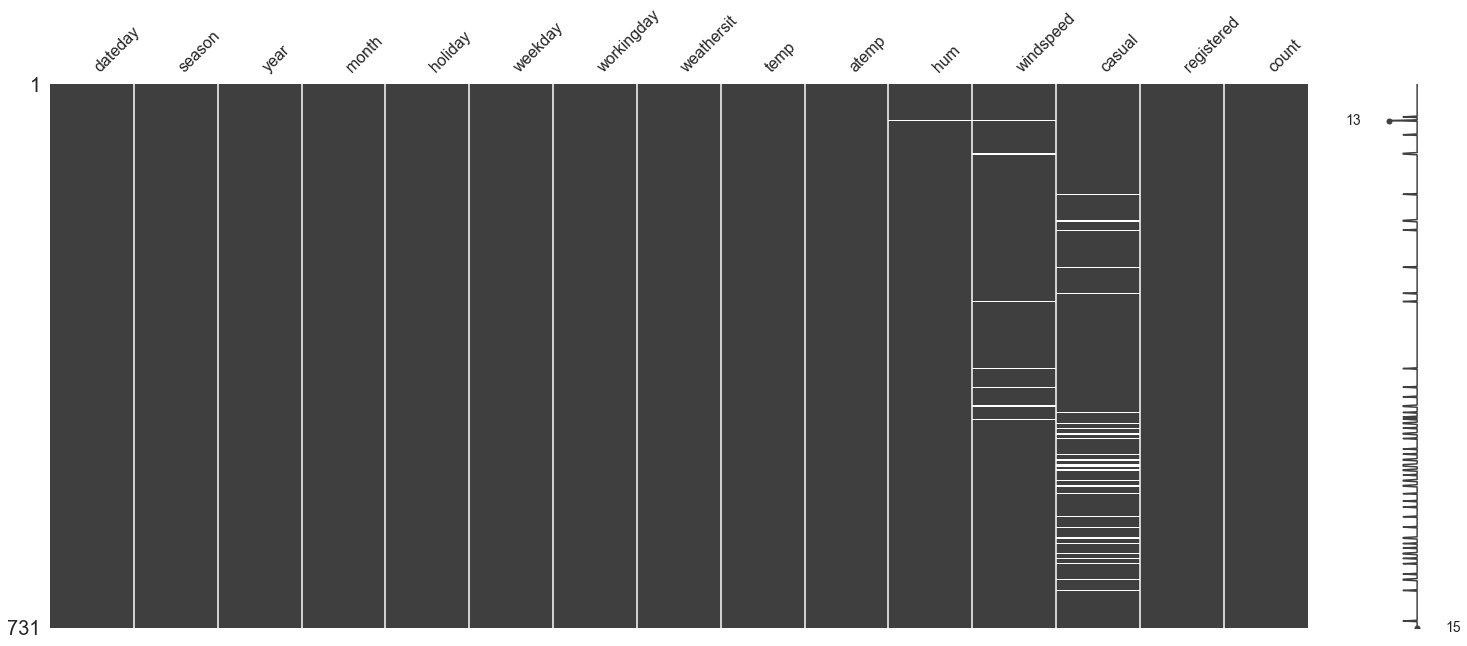

In [51]:
msno.matrix(df)

In [52]:
df_m1 = df.copy()
df_m2 = df.copy()
df_m3 = df.copy()
df_m4 = df.copy()
df_m5 = df.copy()

In [53]:
df_m1.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [54]:
#the value was 131
df_m1.iloc[1,12] = np.nan
df_m2.iloc[1,12] = np.nan
df_m3.iloc[1,12] = np.nan
df_m4.iloc[1,12] = np.nan
df_m5.iloc[1,12] = np.nan


In [55]:
df_m1.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,NaN,670.0,801.0
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [56]:
#using mean method 
df_m1['casual'] = df_m1['casual'].fillna(df_m1['casual'].mean())
df_m1.iloc[1,12]

732.8862973760932

In [57]:
#using median method 
df_m2['casual'] = df_m2['casual'].fillna(df_m2['casual'].median())
df_m2.iloc[1,12]

675.0

In [58]:
#using interpolate method to replace the outliers(NEAREST)
df_m3['casual'] = df_m3['casual'].interpolate(method = 'nearest', limit_direction = 'both')
df_m3.iloc[1,12]

331.0

In [59]:
#using interpolate method to replace the outliers(LINEAR)
df_m4['casual'] = df_m4['casual'].interpolate(method = 'linear', limit_direction = 'both')
df_m4.iloc[1,12]

225.5

In [60]:
#using interpolate method to replace the outliers(Cubic)
df_m5['casual'] = df_m5['casual'].interpolate(method = 'cubic', limit_direction = 'both')
df_m5.iloc[1,12]

169.9172898670703

In [61]:
df_m5.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.00000,654.0,985.0
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,169.91729,670.0,801.0
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.00000,1229.0,1349.0
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.00000,1454.0,1562.0
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.00000,1518.0,1600.0


using interpolate method  to replace the nan in df column

In [62]:
#using interpolate method to replace the outliers
df['hum'] = df['hum'].interpolate(method ='cubic', limit_direction = 'both')
df['windspeed'] = df['windspeed'].interpolate(method ='cubic', limit_direction = 'both')
df['casual'] = df['casual'].interpolate(method ='cubic', limit_direction = 'both')

In [63]:
df.isnull().sum()

dateday       0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

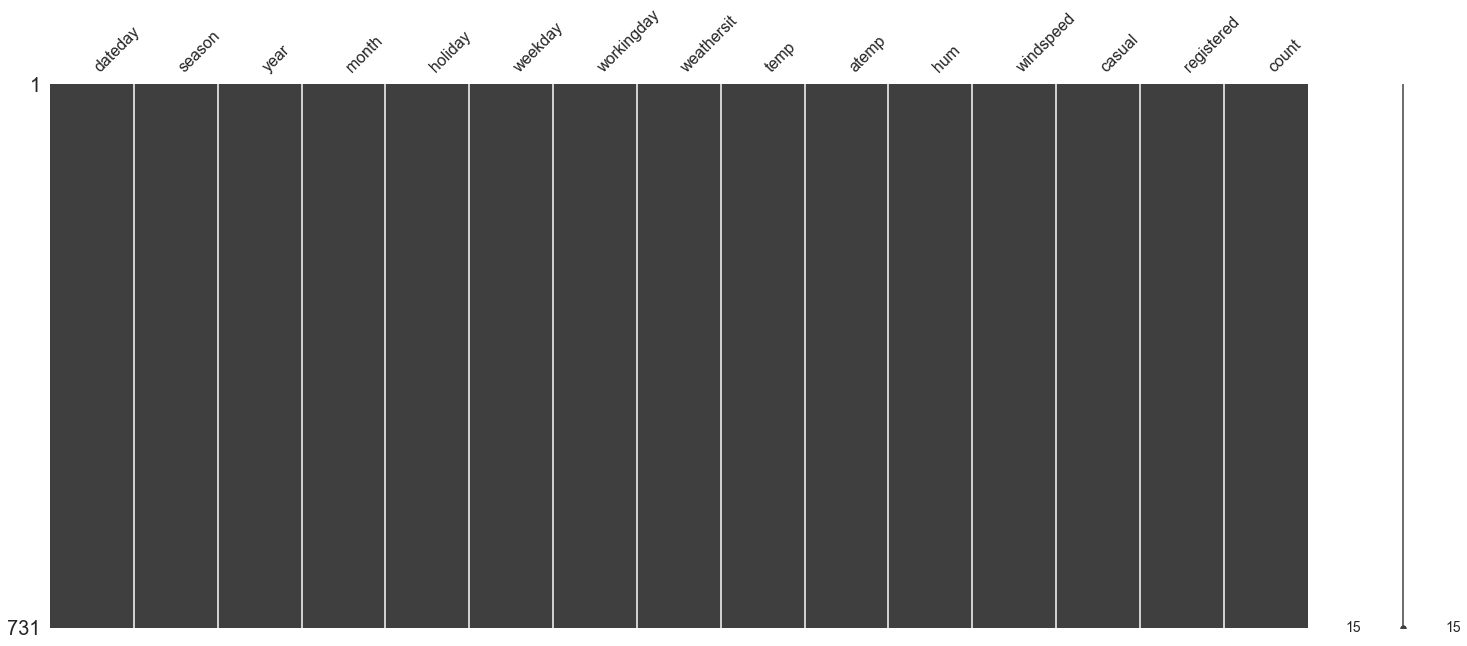

In [64]:
msno.matrix(df)

checking again the outlietrs 

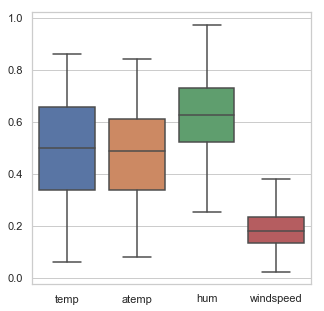

In [65]:
sns.boxplot(data=df[['temp','atemp', 'hum', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(5,5)

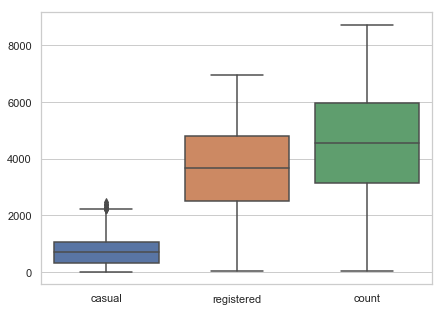

In [66]:
sns.boxplot(data=df[[ 'casual', 'registered', 'count']])

we have removed the outliers for casual but still we are getting , because after removing the outliers and when we replaced the nans with interpolate. those values might be actinga as outlier when the next minimum and max is made.

In [67]:
df.dtypes

dateday       datetime64[ns]
season              category
year                category
month               category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
count                float64
dtype: object

In [68]:
#making a copy of the df , we are naming it bike_data
bike_data = df.copy();

In [69]:
bike_data.dtypes

dateday       datetime64[ns]
season              category
year                category
month               category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
count                float64
dtype: object

# feature selection(dimensionlity reduction) - for numerical

In [70]:
num_colnames = ["temp","atemp","hum","windspeed","casual","registered","count"]
cat_colnames = ["season","year","month","holiday","weekday","workingday","weathersit"]
bike_data_num=bike_data.loc[:,num_colnames]

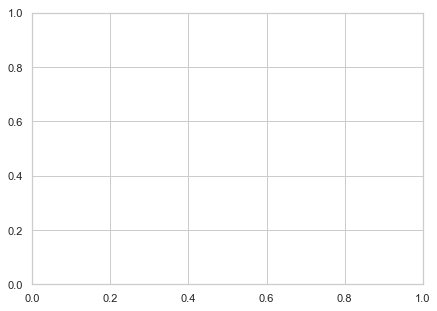

In [71]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr_matrix = bike_data_num.corr().abs()

In [72]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,temp,atemp,hum,windspeed,casual,registered,count
temp,1,0.991702,0.123431,0.150256,0.594834,0.540012,0.627494
atemp,0.991702,1,0.137013,0.176047,0.594466,0.544192,0.631066
hum,0.123431,0.137013,1,0.214651,0.0816912,0.11201,0.121642
windspeed,0.150256,0.176047,0.214651,1,0.193678,0.211365,0.226815
casual,0.594834,0.594466,0.0816912,0.193678,1,0.415295,0.654747
registered,0.540012,0.544192,0.11201,0.211365,0.415295,1,0.945517
count,0.627494,0.631066,0.121642,0.226815,0.654747,0.945517,1


 temp and atemp is having max correlation (0.991702). so we need to drop one from these two. we will drop the atemp(as this is the temp felt which might change for person to person and it in future the temp felt might not be availabe).Its better to have as input as temp because it will be availabe and it will not change person to person.

we are dropping the "hum" as it has very LESS correaltion with count.
here we have two columns "casual" and "registered" , if we take both , then we will get 99 percent accuracy and that is data leakage .

casual : they are the bikes randomly rented
registered : They are the user which have registered
We are dropping both the coluumns casual and registered because we have the count as the sum of casual and registered. and in future when we have to predict on the basis environment factors.
nobody would have the  casual and regustered count.

here i am keeping the count variable as i need to predict the total numbber of the count for an environment factor.
but in case we need to predict the number of casual users than we would have kept casual column and delete the registerd and total count

In [73]:
bike_data=bike_data.drop(["atemp", "hum", "casual", "registered" ],axis=1)

In [74]:
bike_data.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,windspeed,count
instant,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.160446,985.0
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.248539,801.0
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.248309,1349.0
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.160296,1562.0
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.186900,1600.0


# feature selection(dimensionlity reduction) - for categorical

In [75]:
from scipy.stats import chi2_contingency
#for catagorical variables we will perform Chisquare test of independence
for i in cat_colnames:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_data['count'], bike_data[i]))
    print(p)

season
0.5440596338517547
year
0.367724209978971
month
0.49177634472851
holiday
0.6781463865579803
weekday
0.4102128310764939
workingday
0.45435914436398794
weathersit
0.6407439686474243


null hypothesis : all are independent

alternate : there is relation 


here we are dropping the coulmn having max value of p that is holiday.(as this will not be independent variable with count and we dont want that out variables are independent with target variable)

In [76]:
bike_data=bike_data.drop(["holiday"],axis=1)

In [77]:
bike_data.head()

,dateday,season,year,month,weekday,workingday,weathersit,temp,windspeed,count
instant,,,,,,,,,,
1,2011-01-01,1,0,1,6,0,2,0.344167,0.160446,985.0
2,2011-01-02,1,0,1,0,0,2,0.363478,0.248539,801.0
3,2011-01-03,1,0,1,1,1,1,0.196364,0.248309,1349.0
4,2011-01-04,1,0,1,2,1,1,0.200000,0.160296,1562.0
5,2011-01-05,1,0,1,3,1,1,0.226957,0.186900,1600.0


# Modeling 


In [78]:
#applying discetion tree modle for regression first
#Load libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [79]:
bike_data.head()

,dateday,season,year,month,weekday,workingday,weathersit,temp,windspeed,count
instant,,,,,,,,,,
1,2011-01-01,1,0,1,6,0,2,0.344167,0.160446,985.0
2,2011-01-02,1,0,1,0,0,2,0.363478,0.248539,801.0
3,2011-01-03,1,0,1,1,1,1,0.196364,0.248309,1349.0
4,2011-01-04,1,0,1,2,1,1,0.200000,0.160296,1562.0
5,2011-01-05,1,0,1,3,1,1,0.226957,0.186900,1600.0


In [80]:
#spliting data into test and train for modling
train, test = train_test_split(bike_data, test_size=0.2, random_state=123)
x_train = train.iloc[:,1:9]
y_train = train.iloc[:,9]

x_test = test.iloc[:,1:9]
y_test = test.iloc[:,9]

In [81]:
x_train.head()

,season,year,month,weekday,workingday,weathersit,temp,windspeed
instant,,,,,,,,
643,4,1,10,4,1,2,0.657500,0.117546
706,4,1,12,4,1,1,0.255833,0.174754
567,3,1,7,5,1,2,0.665833,0.208967
228,3,0,8,2,1,1,0.700833,0.236329
271,4,0,9,3,1,2,0.635000,0.148629


In [108]:
#Decision tree for regression
# Train the model using the training sets
fit_DT = DecisionTreeRegressor(max_depth=2).fit(x_train, y_train)
# make the predictions by the model
predictions_DT = fit_DT.predict(x_test)
# data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': predictions_DT})
print(df_dt.head())
#Calculate MAE
def MAE(y_true, y_pred): 
    mae = np.mean(np.abs(( y_true - y_pred) / y_true))
    return mae
mae_dt=MAE(y_test, predictions_DT)
#RMSE
from sklearn.metrics import r2_score
from math import sqrt

def RSQUARE(y_true, y_pred): 
    rsquare = r2_score(y_true, y_pred)
    return rsquare
rsquare_dt =RSQUARE(y_test, predictions_DT)

# Calculate and display accuracy
accuracy_MAPE_dt = 100 - np.mean(mae_dt)*100

# errors and accuracy 
print("MEAN ABSOLUTE ERROR:"+str(mae_dt))
print('Accuracy:', round(accuracy_MAPE_dt, 2), '%.')
print("RSQUARE:"+str(rsquare_dt))


         actual         pred
instant                     
489      6421.0  6814.840909
422      3389.0  4023.153061
92       2252.0  2258.339623
301      3747.0  2258.339623
178      4708.0  4439.852941
MEAN ABSOLUTE ERROR:0.2929033711954789
Accuracy: 70.71 %.
RSQUARE:0.5845297651229586


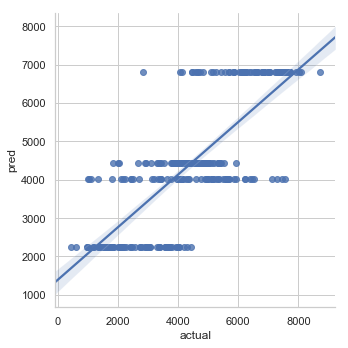

In [109]:
sns.lmplot(x='actual', y='pred', data = df_dt ,fit_reg = True)

In [110]:
#Random forest for regression
#Import libraries for RF
from sklearn.ensemble import RandomForestRegressor
# Train the model using the training sets
RFmodel = RandomForestRegressor(n_estimators = 200).fit(x_train, y_train)
# make the predictions by the model
RF_Predictions = RFmodel.predict(x_test).round(0)
# data frame for actual and predicted values
df_RF = pd.DataFrame({'actual': y_test, 'pred': RF_Predictions})
print(df_dt.head())
# Calculate and display accuracy
mae=MAE(y_test,RF_Predictions)
accuracy = 100 - np.mean(mae*100) 

rsquare_dt =RSQUARE(y_test, RF_Predictions)
print("MEAN ABSOLUTE ERROR:"+str(mae))
print('Accuracy:', round(accuracy, 2), '%.')
print('RSQUARE:', round(rsquare_dt, 2))


         actual         pred
instant                     
489      6421.0  6814.840909
422      3389.0  4023.153061
92       2252.0  2258.339623
301      3747.0  2258.339623
178      4708.0  4439.852941
MEAN ABSOLUTE ERROR:0.17993437597850157
Accuracy: 82.01 %.
RSQUARE: 0.8


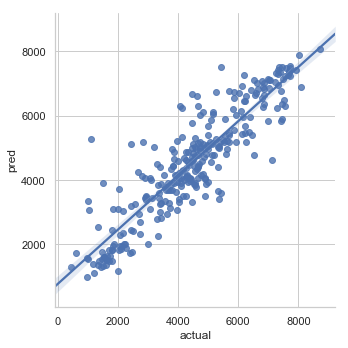

In [111]:
# df_RF.plot.scatter(x='actual', y='pred') 
sns.lmplot(x='actual', y='pred', data = df_RF ,fit_reg = True)


In [112]:
# linear 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(x_train, y_train)

#predict
lr_prediction = lr_model.predict(x_test)

df_lr = pd.DataFrame({'actual':y_test, 'prediction':lr_prediction})

# Calculate and display accuracy
mae_lr=MAE(y_test,lr_prediction)
accuracy_lr = 100 - np.mean(mae_lr*100) 
print("MEAN ABSOLUTE ERROR:"+str(mae_lr))
print('Accuracy:', round(accuracy_lr, 2), '%.')


rsquare_lr =RSQUARE(y_test, lr_prediction)
print("RSQUARE:"+str(rsquare_lr))



MEAN ABSOLUTE ERROR:0.2087007444380406
Accuracy: 79.13 %.
RSQUARE:0.7443018836078218


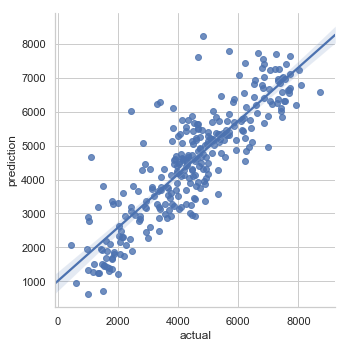

In [113]:
sns.lmplot(x='actual', y='prediction', data = df_lr ,fit_reg = True)

In [114]:

#OLS
#Import libraries for LR
import statsmodels.api as sm
# Train the model using the training sets
model = sm.OLS(y_train,x_train.astype(float)).fit()
#Summary of model
model.summary()
# make the predictions by the model
predictions_OLS = model.predict(x_test.astype(float)).round(0)
# data frame for actual and predicted values
df_OLS = pd.DataFrame({'actual': y_test, 'pred': predictions_OLS})

# Calculate and display accuracy
mae_ols=MAE(y_test,predictions_OLS)
accuracy_ols = 100 - np.mean(mae_ols*100) 
print("MEAN ABSOLUTE ERROR:"+str(mae_ols))
print('Accuracy:', round(accuracy_lr, 2), '%.')


rsquare_ols =RSQUARE(y_test, predictions_OLS)
print("r2score:"+str(rsquare_ols))


model.summary()


MEAN ABSOLUTE ERROR:0.213374470209941
Accuracy: 79.13 %.
r2score:0.7353774870998685


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1641.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):          9.50e-317
Time:                        15:34:29   Log-Likelihood:                -3592.7
No. Observations:                 438   AIC:                             7201.
Df Residuals:                     430   BIC:                             7234.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       554.4669     68.451      8.100      0.000     419.927     689.007
year        2111.0588     84.298     25.043      0.000    1945.371    2276.747
month        -32.2170     20.750     -1.553      0.121     -73.000       8.566
weekday      114.5806     21.078      5.436      0.000      73.153     156.009
workingday   256.3359     90.125      2.844      0.005      79.195     433.477
weathersit  -612.8623     70.188     -8.732      0.000    -750.816    -474.908
temp        5762.4073    229.491     25.110      0.000    5311.344    6213.471
windspeed  -1363.6652    493.967     -2.761      0.006   -2334.555    -392.775
==============================================================================
Omnibus:                       59.551   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.169
Skew:                          -0.718   Prob(JB):                     7.34e-30
Kurtosis:                       5.299   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

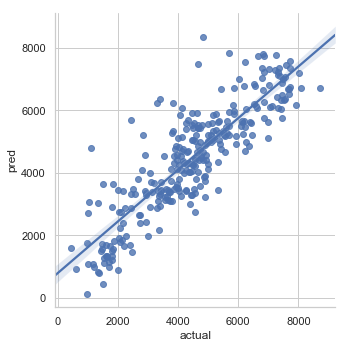

In [115]:
sns.lmplot(x='actual', y='pred', data = df_OLS ,fit_reg = True)

In [116]:
#output
df_RF.to_csv("bike_rent_pyhton.csv", index= False)